<h1>BlendererOnline</h1>
<small><i>Uses some codes of <a href='https://urlzs.com/4hkfp' target='_blank' rel='noopener'>BlenderRender</a> by <a href='https://urlzs.com/ToHpE' target='_blank' rel='noopener'>aniquetahir</a>.</i></small>

<p>Render Blender files online, for free. </p>

In [3]:
#@title Configuration
class formatting:
    clear = '\033[0m'
    class color: 
        purple = '\033[95m'
        cyan = '\033[96m'
        cyan_dark = '\033[36m'
        blue = '\033[94m'
        green = '\033[92m'
        yellow = '\033[93m'
        red = '\033[91m'
    class font:
        bold = '\033[1m'
        underline = '\033[4m'

## Define screen functions. 
def clear(): from IPython.display import clear_output; return clear_output()

class info: # screen messages
    def status(message): print(formatting.font.bold + 'Status: \t' + formatting.clear + message)
    def err(message): print(formatting.font.bold + formatting.color.red + 'Error: \t' + formatting.clear + formatting.clear + message)
    def warning(message): print(formatting.font.bold + formatting.color.yellow + 'Warning: \t' + formatting.clear + formatting.clear + message)
    def success(message): print(formatting.font.bold + formatting.color.green + 'Success: \t' + formatting.clear + formatting.clear + message)

def check_compatibility(): 
    try: from google.colab import files
    except: raise TypeError("No! Please run this in " + formatting.font.bold + 'Google CoLab' + formatting.clear + '. ')

def getExtension(fileName): 
    import os
    fileName_split = os.path.splitext(fileName)

    return fileName_split[1].lower()

def UploadBlendFile(): # Make sure that the file is actually a Blender file. 
    check_compatibility()

    import pathlib; from google.colab import files
    uploaded_file = files.upload()
    
    return uploaded_file

def checkValidUpload(what): # Make sure that the user has that file uploaded when specifying the name. 
    import os
    if not(os.system('cat ' + str(what))):
        info.warning('File does not exist.')
    return (not(os.system('cat ' + str(what))))

def properlySetFrames(frame_start, frame_end): 
    if frame_start == frame_end: return frame_end
    else: return False

class configuration: 
    #@markdown ### Input
    
    upload_new = 0 #@param {type:"slider", min:0, max:1, step:1}
    if upload_new == True: UploadBlendFile()

    # user preferred file name
    blend_fileName = 'test.blend' #@param {type: "string"}
    blend_fileName = blend_fileName.strip()
    if blend_fileName != None: 
        if getExtension(blend_fileName) != '.blend' : blend_fileName = (str(blend_fileName) + '.blend'); checkValidUpload(blend_fileName)

    #@markdown ### Processing
    renderer = "CYCLES" #@param ["CYCLES", "BLENDER_EEVEE", "BLENDER_WORKBENCH"]
    device = "CPU" #@param ["CPU", 'CUDA', 'OPTIX', 'HIP', 'METAL']

    #@markdown ### Animation
    frame_start = 1  #@param {type: "number"}
    frame_end = 1 #@param {type: "number"}

    frame = properlySetFrames(frame_start, frame_end)

    #@markdown ### Output
    output_fileFormat = 'JPEG' #@param ['TGA', 'RAWTGA', 'JPEG', 'IRIS', 'IRIZ', 'AVIRAW', 'AVIJPEG', 'PNG', 'BMP']


In [5]:
import os

class formatting:
    clear = '\033[0m'
    class color: 
        purple = '\033[95m'
        cyan = '\033[96m'
        cyan_dark = '\033[36m'
        blue = '\033[94m'
        green = '\033[92m'
        yellow = '\033[93m'
        red = '\033[91m'
    class font:
        bold = '\033[1m'
        underline = '\033[4m'

class info: # screen messages
    def status(message): print(formatting.font.bold + 'Status: \t' + formatting.clear + message)
    def err(message): print(formatting.font.bold + formatting.color.red + 'Error: \t' + formatting.clear + formatting.clear + message)
    def warning(message): print(formatting.font.bold + formatting.color.yellow + 'Warning: \t' + formatting.clear + formatting.clear + message)
    def success(message): print(formatting.font.bold + formatting.color.green + 'Success: \t' + formatting.clear + formatting.clear + message)

def check_fieldsFilled(): # Make sure that the user has run the previous cell. 
    try: 
        clear()
    except: 
        raise ImportError(formatting.font.bold + 'Please run the configurations cell before rendering. ' + formatting.clear + 'No default values are to be passed by this cell. ')
        return False
    else: 
        if configuration.blend_fileName == None: 
            raise ImportError(formatting.font.bold + 'The file name for the Blender file is missing. ' + formatting.clear + 'It is a required field. ')
        else: 
            return True

def install(what, isCritical = False):
    if what == "required":
        install("blender", True)
        install("libboost-all-dev")
        install("libgl1-mesa-dev")
        clear()
    else:
        info.status('Installing ' + what + '…')
        try:
            if os.system('apt install ' + what + ' -y') > 0: 
                if os.system('apt-get install ' + what + ' -y') > 0: 
                    if os.system('apt install --fix-broken ' + what + ' -y'): raise
        except:
            errorMsg = (what + ' could not get installed. ')
            if isCritical: raise SystemError(errorMsg + 'Unfortunately, this module is required. ')
            else: info.err(errorMsg)
        else: 
            os.system('apt clean && apt autoremove -y')
            info.success('Installed '+ what + '.')

def render(): 
    def checkInvalidUploadProceed(): # Make sure user is sure that the file does exist. 
        clear()
        if not(checkValidUpload(configuration.blend_fileName)): 
            confirm_tries = 2; confirm_count = 0; 
            while confirm_count < confirm_tries: 
                try:
                    input('This will cause errors. Do you want to continue? \n[\tYes (⏎)\t]')
                except KeyboardInterrupt: 
                    return False
                else: 
                    confirm_count = confirm_count + 1
            if confirm_count == 2: return True
        else: return True


    def start_render(): 
        # Command line arguments from here: https://urlzs.com/MiUkt
        # Simplified here: https://urlzs.com/au5z7

        info.status('Starting render of file ' + configuration.blend_fileName + '…')

        if not(configuration.frame): 
            !blender -b {configuration.blend_fileName} -o ./output_ -E {configuration.renderer} -F {configuration.output_fileFormat} -x 1 -s {configuration.frame_start} -e {configuration.frame_end} --cycles-device {configuration.device}
        else: 
            !blender -b {configuration.blend_fileName} -o ./output_ -E {configuration.renderer} -F {configuration.output_fileFormat} -x 1 -f {configuration.frame} --cycles-device {configuration.device}

        info.status('Render of file ' + configuration.blend_fileName + ' has completed.')

    if checkInvalidUploadProceed(): 
        start_render()

def main():
    check_fieldsFilled();
    install("required");
    render();

main()

Status: 	Starting render of file test.blend…
src/tcmalloc.cc:283] Attempt to free invalid pointer 0x7fc749c1e040 


<h2>Utilities</h2>

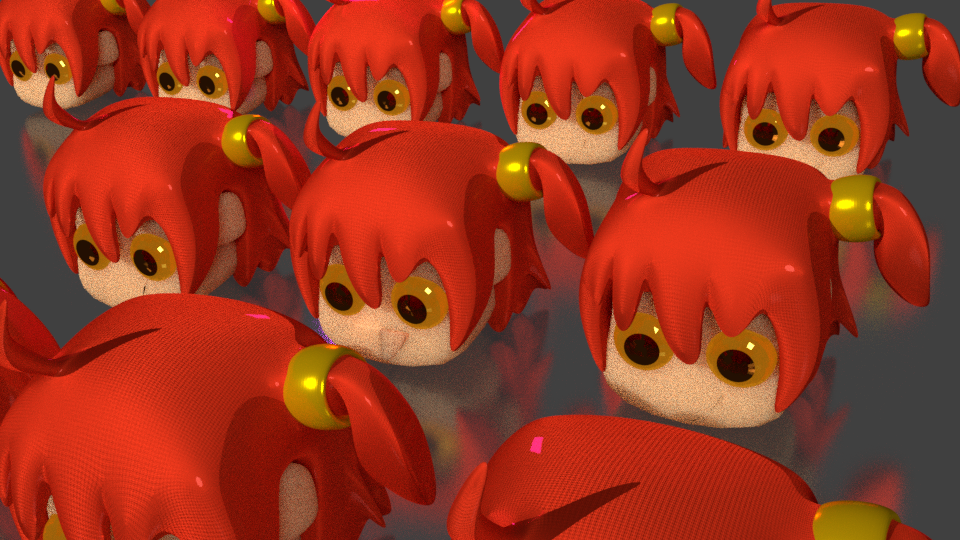

In [ ]:
#@title Picture Viewer
#@title Configuration
class formatting:
    clear = '\033[0m'
    class color: 
        purple = '\033[95m'
        cyan = '\033[96m'
        cyan_dark = '\033[36m'
        blue = '\033[94m'
        green = '\033[92m'
        yellow = '\033[93m'
        red = '\033[91m'
    class font:
        bold = '\033[1m'
        underline = '\033[4m'

## Define screen functions. 
def clear(): from IPython.display import clear_output; return clear_output()

class fileViewer: 
    image_fileName = '' #@param {type: "string"}

def fixFormatImage(): 
    ## Give file format of png if the user didn't give any. Of course they should put it. 
    if getExtension(fileViewer.image_fileName) == None: fileViewer.image_fileName = (str(fileViewer.image_fileName) + '.png')

def preview(): 
    clear()
    try: 
        from IPython.display import Image
        Image(filename=fileViewer.image_fileName)
    except:
        info.err(formatting.font.bold + 'Could not preview the image. ' + formatting.clear + 'Make sure that the file is present and that the file format is correct.')

def main(): 
    fixFormatImage(); preview()

main()

In [ ]:
#@title Video Viewer
#@title Configuration
class formatting:
    clear = '\033[0m'
    class color: 
        purple = '\033[95m'
        cyan = '\033[96m'
        cyan_dark = '\033[36m'
        blue = '\033[94m'
        green = '\033[92m'
        yellow = '\033[93m'
        red = '\033[91m'
    class font:
        bold = '\033[1m'
        underline = '\033[4m'

## Define screen functions. 
def clear(): from IPython.display import clear_output; return clear_output()

class fileViewer: 
    video_fileName = '' #@param {type: "string"}

def fixFormatVideo(): 
    ## Give file format of png if the user didn't give any. Of course they should put it. 
    if (getExtension(fileViewer.video_fileName) == None or getExtension(fileViewer.video_fileName) == ''): fileViewer.video_fileName = (str(fileViewer.video_fileName) + '.avi')

def preview(): 
    clear()
    try: 
        from IPython.display import Video
        Video(fileViewer.video_fileName, embed=True)
    except:
        info.err(formatting.font.bold + 'Could not preview the video. ' + formatting.clear + 'Make sure that the file is present and that the file format is correct.')

def main(): 
    fixFormatVideo(); preview()

main()